# 2020 U.S. Census Demographic and Housing Characteristics File (DHC)

On May 25, 2023, the U.S. Census Burea released the [2020 Demographic and Housing Characteristics File (DHC)](https://www.census.gov/data/tables/2023/dec/2020-census-dhc.html). We are pleased to announce that [censusdis](https://github.com/vengroff/censusdis) supported this data set from the moment it was released.

One of the key [design goals](https://github.com/vengroff/censusdis/blob/main/design-goals.md) of the censusdis project was that it should support as many data sets as possible, including new ones as they are released. It does this by querying metadata on datasets from U.S. Census servers rather than relying on any hard-coded data set descriptions or metadata than has to be manually maintained as part of the project.

We are going to demonstrate using the DHC data set to understand how the age distribution of 
people who own their homes are different from those who rent in any of several states. 
Are renters mostly young adults? What about elderly? We're about to use the DHC data to find out.

## Imports and Configuration

In [1]:
import censusdis.data as ced
from censusdis.states import NM, NJ, NY, NAMES_FROM_IDS
import matplotlib.ticker as mtick

from typing import Tuple

In [2]:
import pandas as pd

# Some of the names and descriptions of variables get really long.
# This option ensures they are readable in the notebook.
pd.set_option('display.max_colwidth', 200)

In [3]:
# See https://www2.census.gov/data/api-documentation/2020-demographic-profile-and-dhc/using-the-census-data-api-to-make-a-group-call-from-the-2020-demographic-and-housing-characteristics-file.pdf
DATASET = 'dec/dhc' 
VINTAGE = 2020

## Query the groups and geographies in the DHC dataset

This is normally the first step when we are exploring a new dataset. We want to know what groups it contains and what they represent.

In [4]:
df_dhc_groups = ced.variables.all_groups(DATASET, VINTAGE)

In [5]:
df_dhc_groups

,DATASET,YEAR,GROUP,DESCRIPTION
0,dec/dhc,2020,H1,HOUSING UNITS
1,dec/dhc,2020,H10,TENURE BY RACE OF HOUSEHOLDER
2,dec/dhc,2020,H11,TENURE BY HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER
3,dec/dhc,2020,H12,TENURE BY HOUSEHOLD SIZE
4,dec/dhc,2020,H12A,TENURE BY HOUSEHOLD SIZE (WHITE ALONE HOUSEHOLDER)
...,...,...,...,...
244,dec/dhc,2020,PCT9E,HOUSEHOLD TYPE BY RELATIONSHIP FOR THE POPULATION 65 YEARS AND OVER (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE)
245,dec/dhc,2020,PCT9F,HOUSEHOLD TYPE BY RELATIONSHIP FOR THE POPULATION 65 YEARS AND OVER (SOME OTHER RACE ALONE)
246,dec/dhc,2020,PCT9G,HOUSEHOLD TYPE BY RELATIONSHIP FOR THE POPULATION 65 YEARS AND OVER (TWO OR MORE RACES)
247,dec/dhc,2020,PCT9H,HOUSEHOLD TYPE BY RELATIONSHIP FOR THE POPULATION 65 YEARS AND OVER (HISPANIC OR LATINO)


### Filter the groups

Normally the next step is to find the groups containing variables that
interest us. Let's assume we are interested in understanding how the 
age distribution of renters differs from that of homeowners. The U.S.
Census uses the term tenure to indicate whether people own or rent. So 
we will look for groups whose description contains both `'AGE'` and
`'TENURE'`.

In [6]:
df_dhc_groups[
    df_dhc_groups['DESCRIPTION'].str.contains('AGE') &
    df_dhc_groups['DESCRIPTION'].str.contains('TENURE')
]

,DATASET,YEAR,GROUP,DESCRIPTION
13,dec/dhc,2020,H13,TENURE BY AGE OF HOUSEHOLDER
14,dec/dhc,2020,H13A,TENURE BY AGE OF HOUSEHOLDER (WHITE ALONE HOUSEHOLDER)
15,dec/dhc,2020,H13B,TENURE BY AGE OF HOUSEHOLDER (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)
16,dec/dhc,2020,H13C,TENURE BY AGE OF HOUSEHOLDER (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)
17,dec/dhc,2020,H13D,TENURE BY AGE OF HOUSEHOLDER (ASIAN ALONE HOUSEHOLDER)
18,dec/dhc,2020,H13E,TENURE BY AGE OF HOUSEHOLDER (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE HOUSEHOLDER)
19,dec/dhc,2020,H13F,TENURE BY AGE OF HOUSEHOLDER (SOME OTHER RACE ALONE HOUSEHOLDER)
20,dec/dhc,2020,H13G,TENURE BY AGE OF HOUSEHOLDER (TWO OR MORE RACES HOUSEHOLDER)
21,dec/dhc,2020,H13H,TENURE BY AGE OF HOUSEHOLDER (HISPANIC OR LATINO HOUSEHOLDER)
22,dec/dhc,2020,H13I,"TENURE BY AGE OF HOUSEHOLDER (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)"


In [7]:
GROUP = 'H13'

In [8]:
ced.variables.group_tree(DATASET, VINTAGE, GROUP)

+  
    + Total: (H13_001N)
        + Owner occupied: (H13_002N)
            + Householder 15 to 24 years (H13_003N)
            + Householder 25 to 34 years (H13_004N)
            + Householder 35 to 44 years (H13_005N)
            + Householder 45 to 54 years (H13_006N)
            + Householder 55 to 59 years (H13_007N)
            + Householder 60 to 64 years (H13_008N)
            + Householder 65 to 74 years (H13_009N)
            + Householder 75 to 84 years (H13_010N)
            + Householder 85 years and over (H13_011N)
        + Renter occupied: (H13_012N)
            + Householder 15 to 24 years (H13_013N)
            + Householder 25 to 34 years (H13_014N)
            + Householder 35 to 44 years (H13_015N)
            + Householder 45 to 54 years (H13_016N)
            + Householder 55 to 59 years (H13_017N)
            + Householder 60 to 64 years (H13_018N)
            + Householder 65 to 74 years (H13_019N)
            + Householder 75 to 84 years (H13_020N)
          

In [9]:
VARIABLE_TOTAL = 'H13_001N'
VARIABLE_OWNER_OCCUPIED = 'H13_002N'
VARIABLE_RENTER_OCCUPIED = 'H13_012N'

LEAVES = ced.variables.group_leaves(DATASET, VINTAGE, GROUP)
LEAVES_OWNER = [leaf for leaf in LEAVES if leaf < VARIABLE_RENTER_OCCUPIED]
LEAVES_RENTER = [leaf for leaf in LEAVES if leaf > VARIABLE_RENTER_OCCUPIED]

In [10]:
LEAVES_OWNER

['H13_003N',
 'H13_004N',
 'H13_005N',
 'H13_006N',
 'H13_007N',
 'H13_008N',
 'H13_009N',
 'H13_010N',
 'H13_011N']

In [11]:
LEAVES_RENTER

['H13_013N',
 'H13_014N',
 'H13_015N',
 'H13_016N',
 'H13_017N',
 'H13_018N',
 'H13_019N',
 'H13_020N',
 'H13_021N']

### Query the geographies available

The next step, before we query any actual data, is to look at metadata
about what geographies are available for the data set we are using.
We can then verify that it is possible to query this dataset by state.

We verify this by making sure `['state']` is in the list of supported
geographies. And sure enough it is. It is in fact the fourth one in the
list.

In [12]:
# We'll only look at the first 10 here, but in general
# we will look at more. We are just lucky that `['state']`
# comes in the first 5 in the list.
ced.geographies(DATASET, VINTAGE)[:5]

[['us'], ['region'], ['division'], ['state'], ['state', 'county']]

## Download the data for a few states

Now that we have gotten what we need from the metadata, we can
download the actual data.

In [13]:
states=[NJ, NY, NM]

In [14]:
df_data = ced.download(
    DATASET,
    VINTAGE,
    
    download_variables=['NAME'],
    leaves_of_group=GROUP,
    
    state=states
)

In [15]:
df_data

,STATE,NAME,H13_003N,H13_004N,H13_005N,H13_006N,H13_007N,H13_008N,H13_009N,H13_010N,H13_011N,H13_013N,H13_014N,H13_015N,H13_016N,H13_017N,H13_018N,H13_019N,H13_020N,H13_021N
0,34,New Jersey,10904,151125,317421,429667,258203,249715,386556,208768,86141,55875,297931,280165,234181,113909,99958,137744,71695,36144
1,35,New Mexico,7665,50630,79571,91286,61414,66946,121541,61058,19928,25413,63675,51167,40210,21047,19716,29645,12925,5677
2,36,New York,32589,299338,567829,760773,476173,474819,769399,405813,168245,204959,862750,724288,612900,313050,287119,422541,225173,107414


## Analyze the data

At this point, we have accomplished the main thing we set out to do,
which is to verify that the `censusdis` API is able to download metadata
and data about the new DHC dataset. Again it is important to note that no
changes were made to `censusdis` itself to do this. When the U.S. Census
published this data, `censusdis` was already ready and able to work with
it.

But for the sake of making this notebook look a little more like a complete
study, we are going to analyze the data we downloaded and make a few 
charts.

First, we will compute the fraction of owners that are in each age group, then we will do the same for renters.

In [16]:
df_variables = ced.variables.all_variables(DATASET, VINTAGE, GROUP)

In [17]:
def ages_of_var(var: str) -> str:
    label = df_variables[df_variables['VARIABLE'] == var]['LABEL'].iloc[0]
    ages = label.split('!!')[-1]
    return ages

def owner_age_col(var: str) -> Tuple[str, str]:
    return 'Owners', f'{ages_of_var(var)}'

def renter_age_col(var: str) -> Tuple[str, str]:
    return 'Renters', f'{ages_of_var(var)}'

In [18]:
def plot_state(state: str, plot_owner: bool = False):

    df_state = df_data[df_data['STATE'] == state]

    df_renter = pd.DataFrame()
    df_owner = pd.DataFrame()

    for leaf_renter, leaf_owner in zip(LEAVES_RENTER, LEAVES_OWNER):
        # Make sure we are working with the same age range.
        assert ages_of_var(leaf_renter) == ages_of_var(leaf_owner)
        df_renter[ages_of_var(leaf_renter)] = (
            df_state[leaf_renter] / (df_state[leaf_renter] + df_state[leaf_owner])
        )
        df_owner[ages_of_var(leaf_owner)] = (
            df_state[leaf_owner] / (df_state[leaf_renter] + df_state[leaf_owner])
        )

    if plot_owner:
        ax = df_owner.T.plot.bar(
            title=f"Percentage of Householders that Own by Age Group in {NAMES_FROM_IDS[state]}",
            figsize=(10, 6),
            legend=False,
        )
    else:
        ax = df_renter.T.plot.bar(
            title=f"Percentage of Householders that Rent by Age Group in {NAMES_FROM_IDS[state]}",
            figsize=(10, 6),
            legend=False,
        )

    ax.set_ylim(0, 1)
    ax.yaxis.grid()
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) 

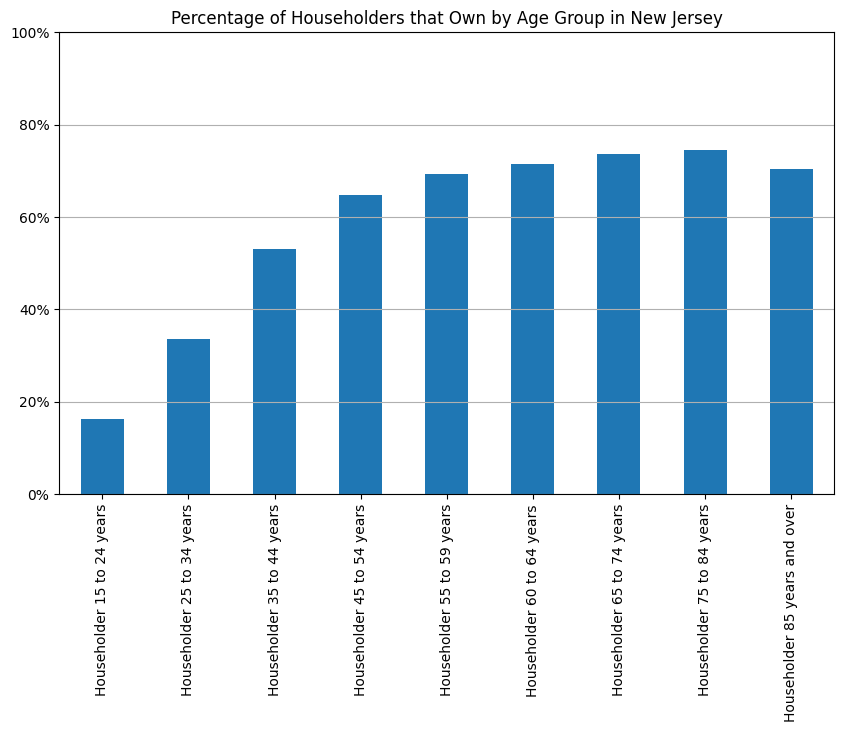

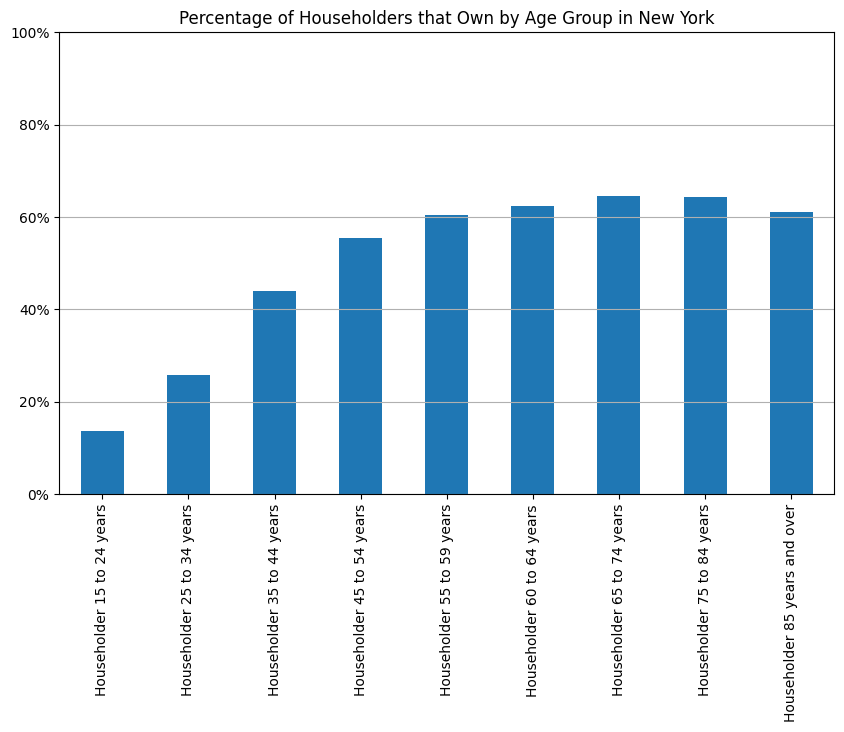

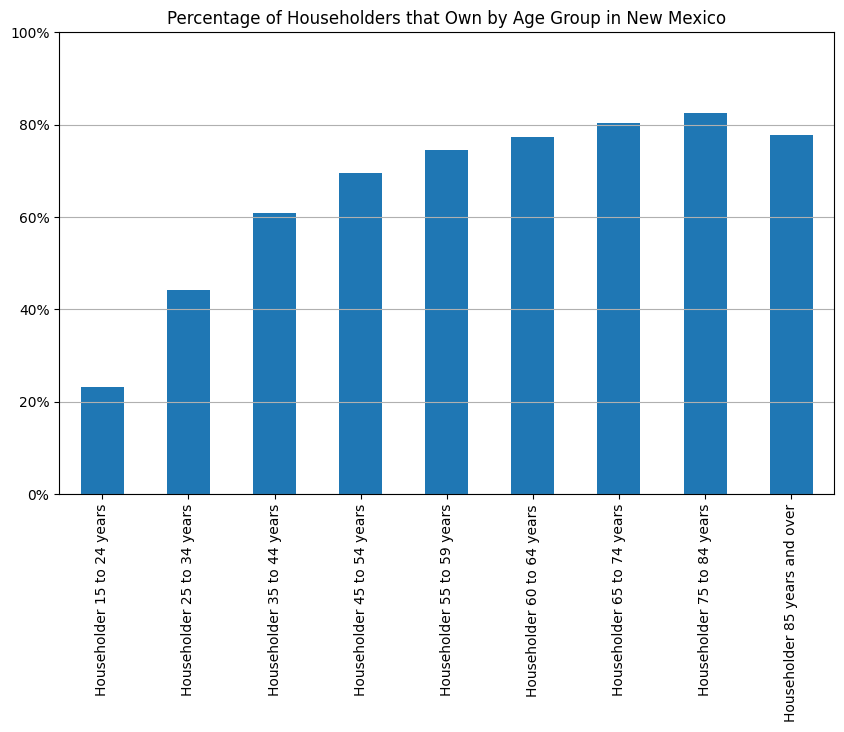

In [19]:
for state in states:
    plot_state(state, plot_owner=True)